# Polynomial Regression Model for Real Estate Data
### This notebook demonstrates a polynomial regression model to predict the longitude values using distance to the nearest MRT station as a feature. Different polynomial degrees are evaluated, and their performance is compared based on Mean Squared Error (MSE) and R-squared (R^2) metrics.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate/Real estate.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/real-estate/Real estate.csv'
data = pd.read_csv(file_path)

# Define the input (X) and output (y) for the model
X = data[['X3 distance to the nearest MRT station']].values
y = data['X6 longitude'].values

In [3]:
# Set up degrees and lists to collect metrics
degrees = [1, 2, 3, 4, 5]
mse_scores = []
r2_scores = []
predictions = []

# Train models for each degree
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    y_pred = model.predict(X_poly)
    predictions.append(y_pred)
    
    # Calculate and store metrics
    mse_scores.append(mean_squared_error(y, y_pred))
    r2_scores.append(r2_score(y, y_pred))

<Figure size 1800x1200 with 0 Axes>

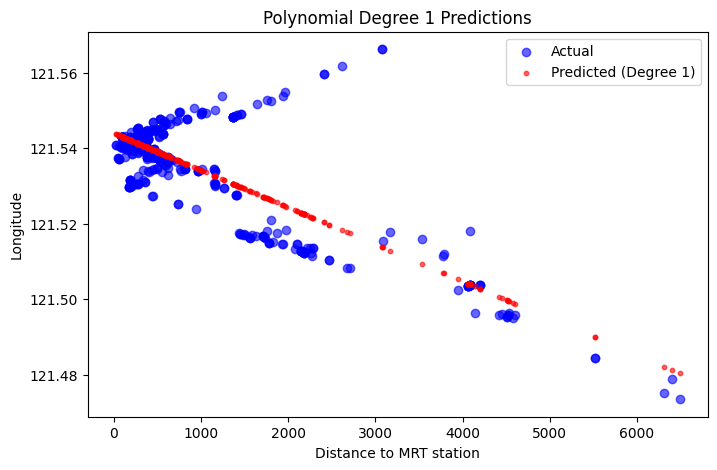

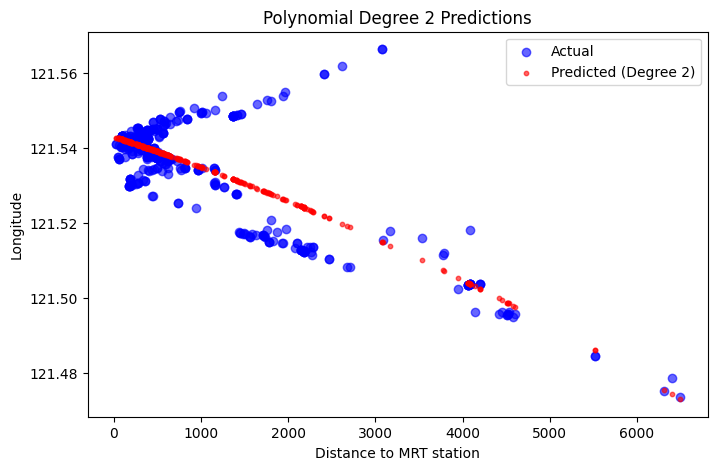

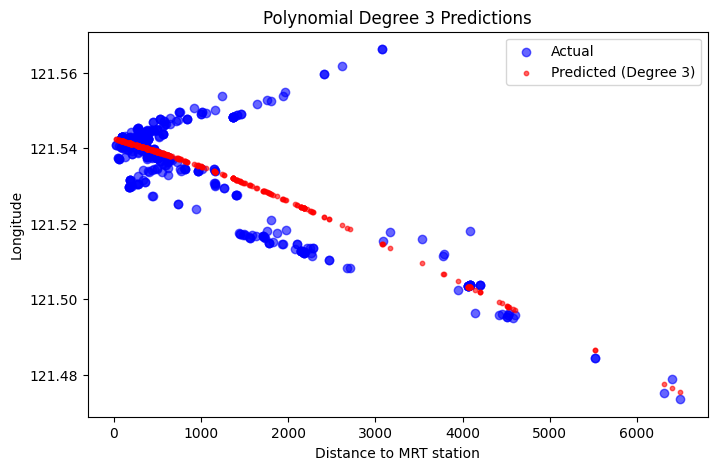

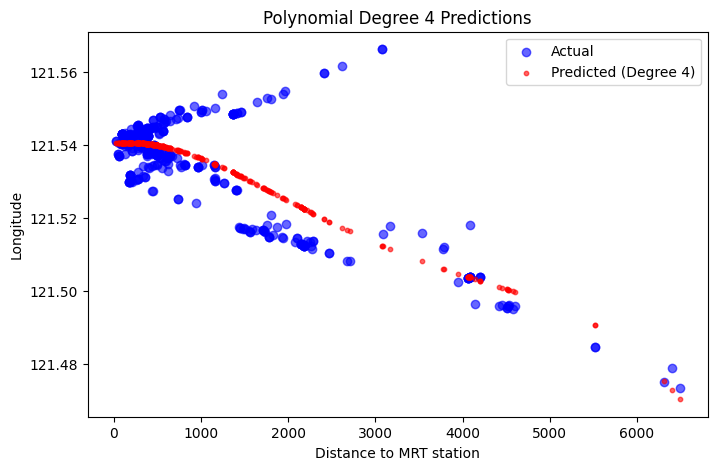

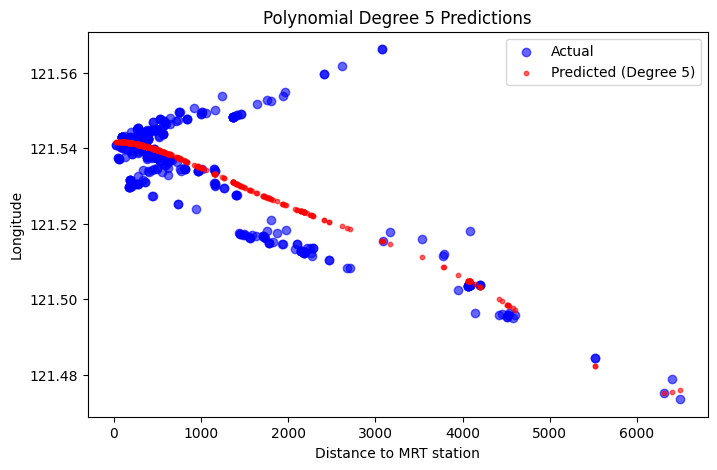

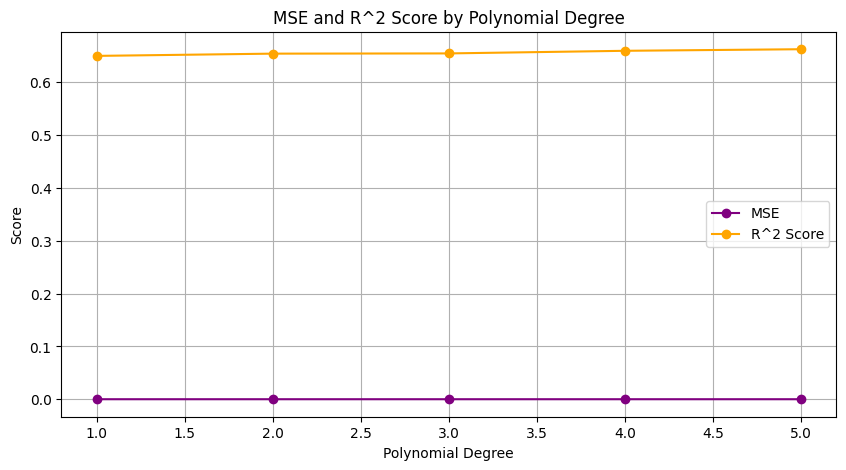

In [4]:
# Visualization of predictions and metrics
plt.figure(figsize=(18, 12))

# Plot predictions for each degree
for i, degree in enumerate(degrees):
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label='Actual', alpha=0.6)
    plt.scatter(X, predictions[i], color='red', label=f'Predicted (Degree {degree})', s=10, alpha=0.6)
    plt.xlabel('Distance to MRT station')
    plt.ylabel('Longitude')
    plt.title(f'Polynomial Degree {degree} Predictions')
    plt.legend()
    plt.show()

# Plot MSE and R^2 score metrics
plt.figure(figsize=(10, 5))
plt.plot(degrees, mse_scores, marker='o', label='MSE', color='purple')
plt.plot(degrees, r2_scores, marker='o', label='R^2 Score', color='orange')
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.title('MSE and R^2 Score by Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Display results
for i, degree in enumerate(degrees):
    print(f'Degree {degree}: MSE = {mse_scores[i]}, R^2 Score = {r2_scores[i]}')

Degree 1: MSE = 8.220400710079939e-05, R^2 Score = 0.6501467328887907
Degree 2: MSE = 8.12039803983363e-05, R^2 Score = 0.6544027615350116
Degree 3: MSE = 8.11039982744551e-05, R^2 Score = 0.6548282769560503
Degree 4: MSE = 7.99389609982146e-05, R^2 Score = 0.6597865765788324
Degree 5: MSE = 7.9237720616078e-05, R^2 Score = 0.6627709960417423
